In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import json

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


In [5]:
df = pd.read_csv('Sakany_dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   356 non-null    object 
 1   Price      356 non-null    int64  
 2   Rating     341 non-null    float64
 3   Longitude  356 non-null    float64
 4   Latitude   356 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.0+ KB


In [7]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [8]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

<ipython-input-8-39d8e0ab3bf4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [9]:
df.describe()

,Price,Rating,Longitude,Latitude
count,356.000000,356.000000,356.000000,356.000000
mean,1591.505618,3.811437,26.551096,31.697233
std,806.262815,0.635356,0.053799,0.016185
min,300.000000,2.500000,26.441000,31.663000
25%,875.000000,3.300000,26.552852,31.692023
50%,1515.500000,3.855718,26.556845,31.698374
75%,2240.000000,4.300000,26.558937,31.707737
max,3250.000000,5.000000,26.643681,31.721998


# **Data Analaysis**

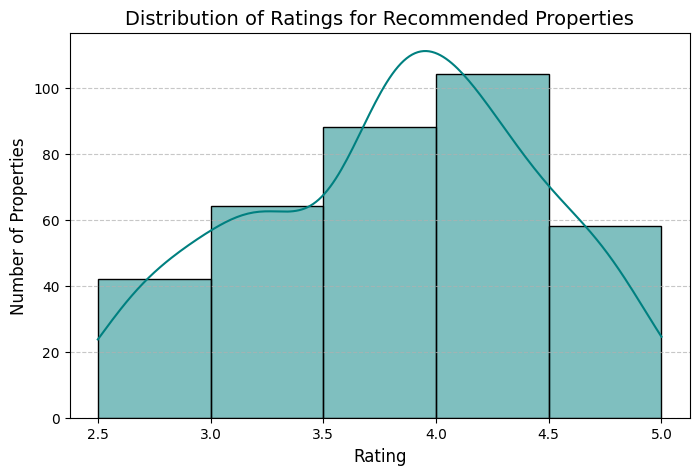

In [138]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], kde=True, bins=5, color='teal')
plt.title('Distribution of Ratings for Recommended Properties', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


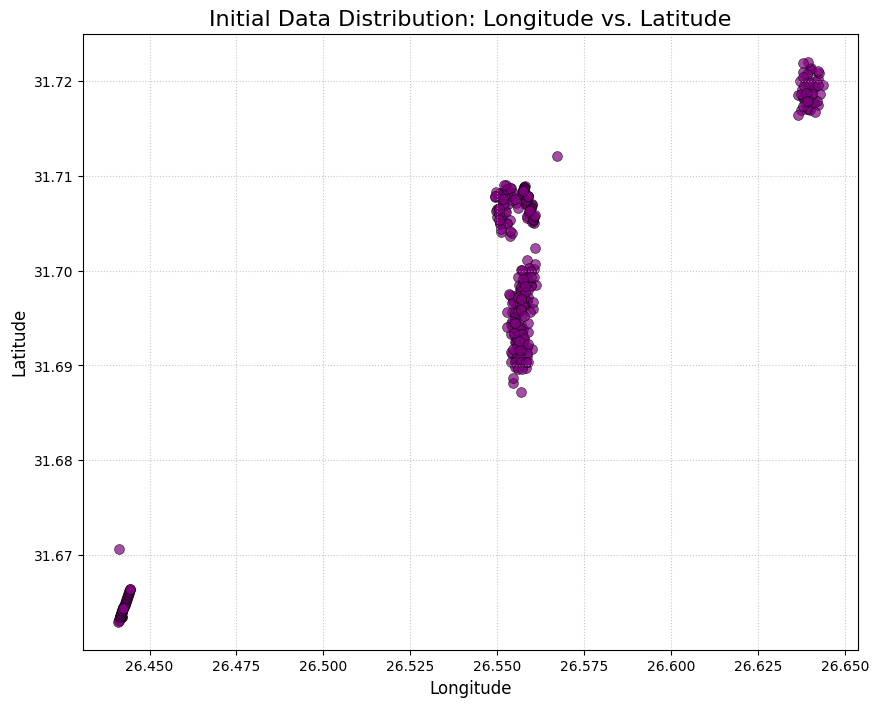

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.7, s=50, color='purple', edgecolor='black', linewidth=0.5)
plt.title('Initial Data Distribution: Longitude vs. Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [148]:
# center = [26.40364660861087, 31.640773267102325]
# df['Scaled_Lat'] = (df['Latitude'] - center[0])**2 * 10000
# df['Scaled_Lon'] = (df['Longitude'] - center[1])**2 * 10000

In [149]:
num_columns = df.select_dtypes(include='number').columns

In [150]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_columns])
scaled_data

array([[-4.86264081e-01, -6.99945053e-16, -2.03237774e+00, ...,
        -2.08526670e+00,  2.04240620e+00,  7.86260831e-01],
       [-1.04518029e+00, -6.99945053e-16,  3.00510045e-01, ...,
         9.15847999e-01, -3.04343476e-01, -5.92600527e-01],
       [ 1.96855732e-01, -6.99945053e-16, -2.03126090e+00, ...,
        -2.08342000e+00,  2.04126903e+00,  7.86260831e-01],
       ...,
       [-6.58907088e-01,  7.70041880e-01,  1.61608732e+00, ...,
         1.24365037e+00, -1.60248624e+00,  2.16512219e+00],
       [ 5.62014323e-01, -8.06094261e-01,  1.69625076e+00, ...,
         1.38494064e+00, -1.68099870e+00,  2.16512219e+00],
       [ 1.05882873e+00, -8.06094261e-01,  1.63867853e+00, ...,
         1.27713120e+00, -1.62461902e+00,  2.16512219e+00]])

In [123]:
X = df[['Longitude', 'Latitude']]
X.head()

,Longitude,Latitude
0,26.44191,31.66349
1,26.56724,31.71202
2,26.44197,31.66352
3,26.44197,31.66352
4,26.55920,31.70601


# **K-Means Clustering**
**Determing the number of clusters (K)**

In [124]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

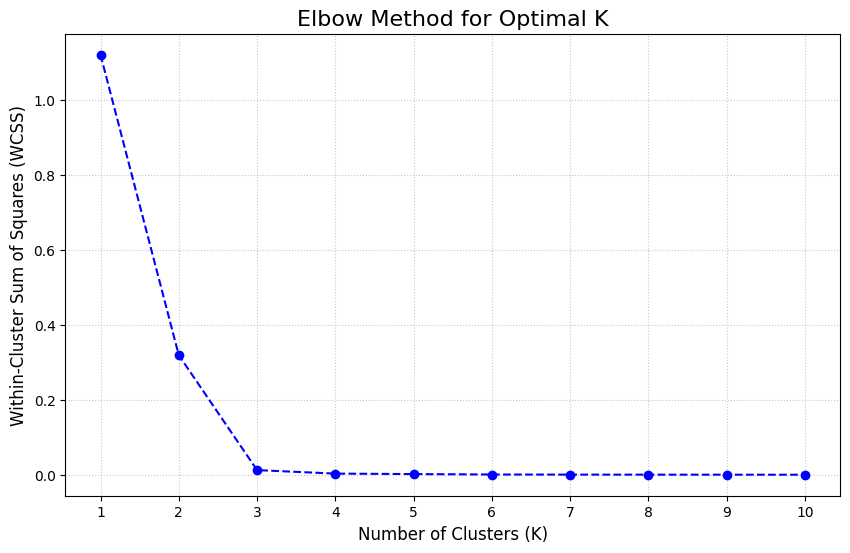

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

### **K-Means Clustering**

In [126]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [127]:
centroids = kmeans.cluster_centers_
print(centroids)

[[26.55632164 31.69976119]
 [26.44248962 31.66459547]
 [26.63977461 31.7190335 ]]


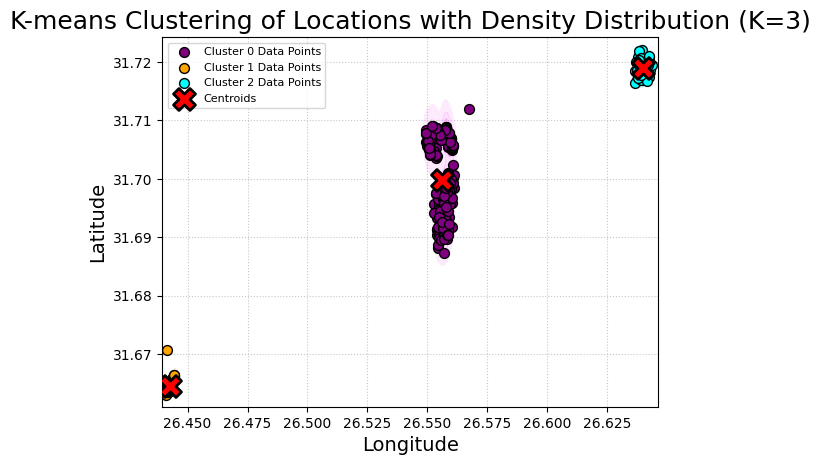

In [129]:
colors = ['purple', 'orange', 'cyan']
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                color=colors[i], s=50, alpha=1.0, label=f'Cluster {i} Data Points',
                edgecolor='black', linewidth=1.0, zorder=3)

    sns.kdeplot(x=cluster_data['Longitude'], y=cluster_data['Latitude'],
                color=colors[i], fill=True, alpha=0.2, ax=plt.gca(), levels=5, zorder=1)

plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='red', marker='X', label='Centroids',
            edgecolor='black', linewidth=2.0, zorder=5)
plt.title('K-means Clustering of Locations with Density Distribution (K=3)', fontsize=18)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(fontsize=8)

plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [130]:
df['Cluster'].head()

,Cluster
0,1
1,0
2,1
3,1
4,0


In [131]:
centroids_list = kmeans.cluster_centers_.tolist()
centroids_filename = 'kmeans_centroids.json'
with open(centroids_filename, 'w') as f:
    json.dump(centroids_list, f, indent=4)

In [132]:
# 2. Save the entire KMeans model using joblib (for Python API approach)
import joblib
model_file_path = 'kmeans_model.joblib'
joblib.dump(kmeans, model_file_path)

['kmeans_model.joblib']

In [133]:
df.to_csv('Sakany_dataset_clustered.csv', index=False)

In [134]:
df_clustered = pd.read_csv('Sakany_dataset_clustered.csv')

In [135]:
df_clustered.head()

,Location,Price,Rating,Longitude,Latitude,Scaled_Lat,Scaled_Lon,Cluster
0,CMR7+Q95 Sohag Al Gadida City,1200,3.811437,26.44191,31.66349,276659.525019,270281.792700,1
1,HP86+QRM Akhmim Sohag Governorate 1823151,750,3.811437,26.56724,31.71202,281788.280624,257407.398124,0
2,CMR7+P9H Sohag Al Gadida City,1750,3.811437,26.44197,31.66352,276662.680934,270275.554100,1
3,CMR7+P9H Sohag Al Gadida City,3250,4.000000,26.44197,31.66352,276662.680934,270275.554100,1
4,HP54+H9W Sohag 2 Sohag Governorate 1684074,1350,4.000000,26.55920,31.70601,281150.575343,258223.868689,0


In [136]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    356 non-null    object 
 1   Price       356 non-null    int64  
 2   Rating      356 non-null    float64
 3   Longitude   356 non-null    float64
 4   Latitude    356 non-null    float64
 5   Scaled_Lat  356 non-null    float64
 6   Scaled_Lon  356 non-null    float64
 7   Cluster     356 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 22.4+ KB


In [147]:
df_clustered = df_clustered.sort_values(by=["Rating"], ascending=False)
df_clustered.head()

,Location,Price,Rating,Longitude,Latitude,Scaled_Lat,Scaled_Lon,Cluster
248,15th Street,1382,5.0,26.557795,31.692932,279765.407978,258366.728418,0
308,New Sohag,2735,5.0,26.640762,31.719451,282577.805802,250001.100711,2
314,New Sohag,1460,5.0,26.637701,31.719090,282539.341947,250307.332105,2
141,Al-Zahraa,1334,5.0,26.556805,31.692437,279712.991499,258467.376114,0
111,Al-Zahraa,2027,5.0,26.556539,31.693398,279814.671378,258494.426586,0


# **Location-Based Recommendation**

In [139]:
import math
import numpy as np
def calculate_euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [140]:
KMEANS_CENTROIDS = np.array(centroids_list)

In [141]:
def predict_cluster(longitude, latitude, centroids):
    new_point = np.array([longitude, latitude])
    min_distance = float('inf')
    predicted_cluster = -1

    for i, centroid in enumerate(centroids):
        distance = calculate_euclidean_distance(new_point, centroid)
        if distance < min_distance:
            min_distance = distance
            predicted_cluster = i
    return predicted_cluster

In [142]:
def get_recommendations(predicted_cluster, df):

    if predicted_cluster == -1:
        return pd.DataFrame()

    recommendations = df_clustered[df_clustered['Cluster'] == predicted_cluster].copy()
    recommendations['Distance_from_Input'] = recommendations.apply(
        lambda row: calculate_euclidean_distance(
            np.array([user_longitude, user_latitude]),
            np.array([row['Longitude'], row['Latitude']])
        ),
        axis=1
    )

    recommendations = recommendations.sort_values(by='Distance_from_Input', ascending=True)

In [143]:
user_longitude_str = input("Enter Longitude: ")
user_longitude = float(user_longitude_str)

user_latitude_str = input("Enter Latitude: ")
user_latitude = float(user_latitude_str)

predicted_cluster = predict_cluster(user_longitude, user_latitude, KMEANS_CENTROIDS)

if predicted_cluster != -1:
    recommendations_df = get_recommendations(predicted_cluster, df_clustered)

    if not recommendations_df.empty:
        print(f"\nRecommended Properties in Cluster {predicted_cluster}:")
        print(recommendations_df[['Location','Price', 'Rating', 'Longitude', 'Latitude']].head(10).to_string(index=False))
    else:
        print("No properties found in this cluster for recommendation.")

Enter Longitude: 26.559791346318452
Enter Latitude: 31.69574134186698

Recommended Properties in Cluster 0:
   Location  Price  Rating  Longitude  Latitude
   Al-Nahda   2258     3.0  26.559353 31.695637
   Al-Nahda   1402     3.8  26.560338 31.695924
   Al-Nahda   1408     4.7  26.560402 31.696723
   Al-Nahda   2042     3.6  26.558572 31.696792
15th Street   1082     3.3  26.558756 31.694488
   Al-Nahda   2073     2.8  26.559012 31.697192
   Al-Nahda   2563     3.0  26.558515 31.696787
   Al-Nahda   2980     3.2  26.557947 31.696306
   Al-Nahda   1725     3.3  26.557604 31.695243
   Al-Nahda   2814     3.9  26.559003 31.697945


In [144]:
# 26.374639504606716, 31.604617465384518